<a href="https://colab.research.google.com/github/anna-victoria/qualificacao-data-analytics-machine-learing/blob/main/Aula12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regressão Linear
##Regrassão Linear Simples

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/victor-ferreira/dataset/main/precificacao_housing.csv")
df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


AttributeError: ignored

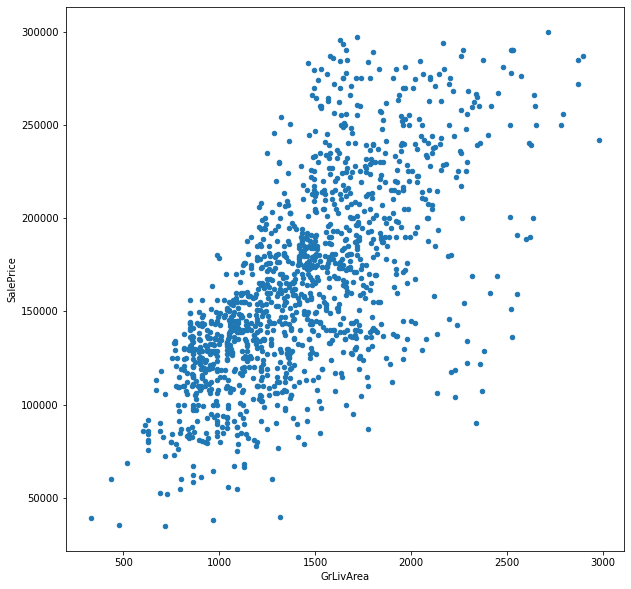

In [ ]:
#gráfico de dispersão
fig, ax = plt.subplots(figsize=(10,10))
df.plot.scatter(x='GrLivArea', y='SalePrice', ax=ax)
df.show()

##Regressão linear simples com scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.linear_model import LinearRegression
#instaciar e escolher os parametros
model = LinearRegression()
#separar os dados entre feature, matrix e target vector (prestar atenção com a 1-feature)
X = df['GrLivArea']
Y = df['SalePrice']
#dividir o dataset entre treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
#fit do modelo (treinar)
model.fit(X_train, Y_train)
#fazer previsões em cima dos novos dados
Y_pred = model.predict(X_test)

ValueError: ignored

In [ ]:
print("df:\t\t", df.shape)
print("X:\t\t", X.shape)
print("X(reshape):\t", X.values.reshape(-1,1).shape)
print("Y:\t\t", Y.shape)

df:		 (1338, 2)
X:		 (1338,)
X(reshape):	 (1338, 1)
Y:		 (1338,)


In [ ]:
from sklearn.linear_model import LinearRegression
#instaciar e escolher os parametros
model = LinearRegression()
#separar os dados entre feature, matrix e target vector (prestar atenção com a 1-feature)
X = df['GrLivArea'].values.reshape(-1,1)
Y = df['SalePrice']
#dividir o dataset entre treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
#fit do modelo (treinar)
model.fit(X_train, Y_train)
#fazer previsões em cima dos novos dados
Y_pred = model.predict(X_test)

In [ ]:
print("Coeficiente:\t", model.coef_)
print("Intercepto:\t", model.intercept_)

Coeficiente:	 [82.22974543]
Intercepto:	 46259.72986724449


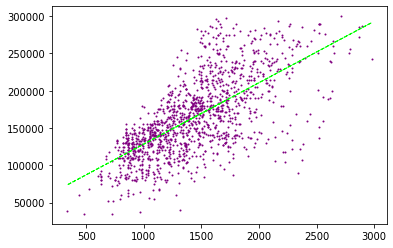

In [ ]:
#plotar reta e dados
fig, ax = plt.subplots()
ax.scatter(X, Y, s=1, color='purple')
ax.plot(X, (model.coef_ * X + model.intercept_), '--r', linewidth=1, color='lime')
plt.show()

In [ ]:
#previsão em cima de novos dados
Y_pred = model.predict(X_test)

In [ ]:
print("R2 Score:", r2_score(Y_test, Y_pred))
print("MAE: \t", mean_absolute_error(Y_test, Y_pred))
print("MSE: \t", mean_squared_error(Y_test, Y_pred))

R2 Score: 0.4660802929119202
MAE: 	 30084.789478403676
MSE: 	 1609124975.4097743


##Regressão linear múltipla

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/victor-ferreira/dataset/main/precificacao_housing_plus.csv")
print("Tamanho do df: {}\n".format(df.shape))
df.drop('Id', axis=1, inplace=True)
df.head()

Tamanho do df: (1460, 35)



,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
model = LinearRegression()

X = df.drop('SalePrice', axis=1)
Y = df['SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

model.fit(X_train, Y_train)

Y1_pred = model.predict(X_test)

In [ ]:
print("df:\t\t", df.shape)
print("X:\t\t", X.shape)
print("Y:\t\t", Y.shape)

df:		 (1460, 34)
X:		 (1460, 33)
Y:		 (1460,)


In [ ]:
print("Coeficiente:", model.coef_)
print("Intercepto:", model.intercept_)

Coeficiente: [-1.39909435e+02  3.72174869e-01  1.79194841e+04  4.12017009e+03
  3.28711867e+02  1.41006242e+02  1.07261182e+01 -1.41513595e+00
 -7.10904670e-02  9.23989180e+00  2.86834785e+01  2.23542456e+01
 -1.79279504e+01  3.31097737e+01  9.64046792e+03  6.39127675e+03
  4.07205682e+03 -1.64809470e+03 -1.23355134e+04 -1.81121738e+04
  5.55547385e+03  1.15630750e+03  1.43149596e+04 -1.56803792e+01
  1.82540782e+01  8.97207607e-01  6.59636845e+00  2.23987449e+01
  4.32900682e+01 -4.26002697e+01 -3.93010527e-01  1.89214869e+01
 -9.19465144e+02]
Intercepto: 852631.895819172
